In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import WrappedDiro2C, plot_diro2c_2d, get_pruned_trees, eval_diro2c
from surrogate_tree import get_feature_importances, plot_feature_importances, plot_surrogate_tree,\
                           extract_rules, print_rules, plot_tree_leafs_for_class
from util import RuleClassifier, evaluate_counterfactual_fidelity, get_complexity, group_metrics

In [2]:
with open('task.pickle', 'rb') as f:
    clf_a, clf_b, X, y, feature_names, feature_precisions = pickle.load(f)

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

In [4]:
mclass_diff = comparer.predict_mclass_diff(X)

# Explanations

In [5]:
%%time
for class_name in comparer.class_names:
    print(class_name)
    explainer = WrappedDiro2C(X, comparer, class_name)
    explanation = explainer.generate_global_explanation()
    with open(f'diro2c.{class_name}.pickle', 'wb') as f:
        pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

(0, 0)
(0, 1)
(1, 0)
(1, 1)
CPU times: user 35min 30s, sys: 16.8 s, total: 35min 47s
Wall time: 38min 32s


## $(1,0)$

In [5]:
focus_class = '(1, 0)'
y_true = comparer.class_names[mclass_diff] == focus_class

In [6]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [7]:
%%time
trees = get_pruned_trees(explanation)
tree_it = iter(trees)
len(trees)

CPU times: user 6.33 s, sys: 93.6 ms, total: 6.42 s
Wall time: 7.35 s


118

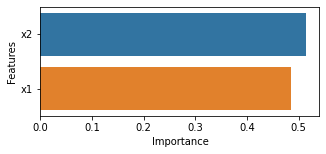

In [8]:
feature_importances, feature_order = get_feature_importances(trees[-1])
plot_feature_importances(feature_names, feature_importances, feature_order)

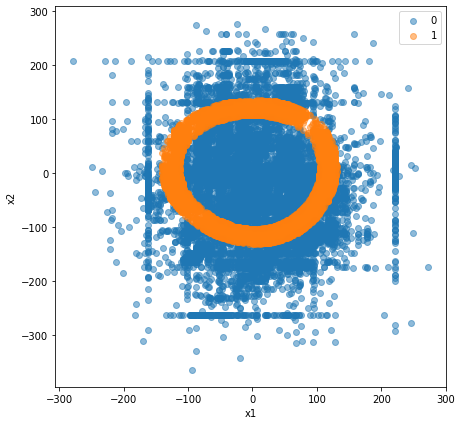

In [10]:
plot_diro2c_2d(explanation, 'x1', 'x2')

### 5 Leafs

In [11]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.05090219759710779, 4, 5)

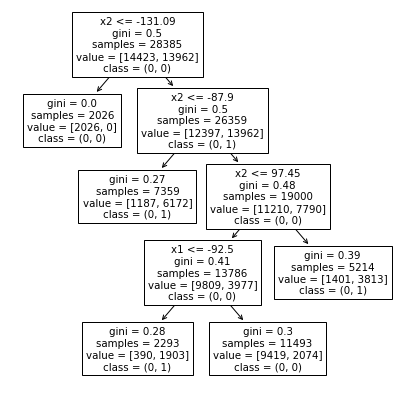

In [13]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [14]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -131.08855438232422 < x2 <= -87.90436935424805 => (0, 1) [1187, 6172]
2. x2 > 97.4512710571289 => (0, 1) [1401, 3813]
3. x1 <= -92.50411605834961 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [390, 1903]


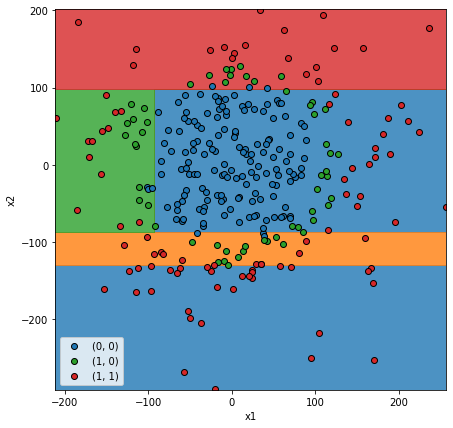

In [15]:
plot_tree_leafs_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names)

### 6 Leafs

In [16]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.047144262572533846, 5, 6)

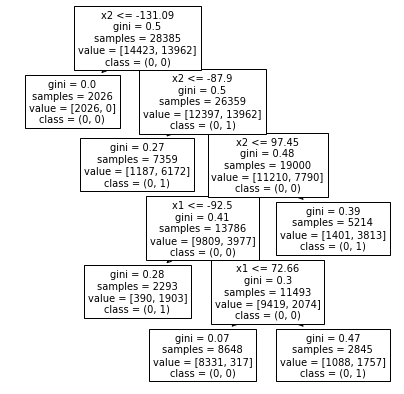

In [18]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [19]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -131.08855438232422 < x2 <= -87.90436935424805 => (0, 1) [1187, 6172]
2. x2 > 97.4512710571289 => (0, 1) [1401, 3813]
3. x1 > 72.6623764038086 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [1088, 1757]
4. x1 <= -92.50411605834961 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [390, 1903]


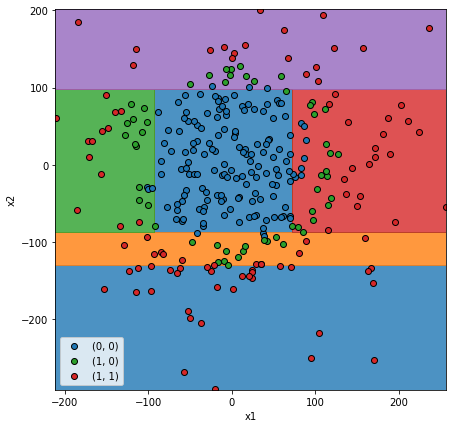

In [20]:
plot_tree_leafs_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names)

### 7 Leafs

In [21]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.028142064607212608, 5, 7)

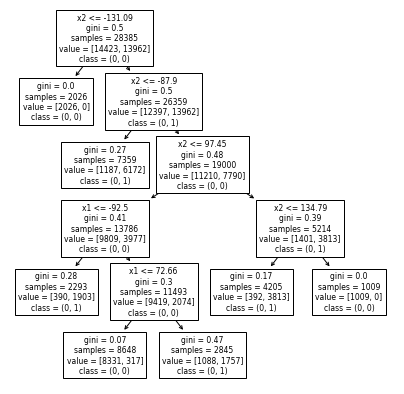

In [23]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [24]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -131.08855438232422 < x2 <= -87.90436935424805 => (0, 1) [1187, 6172]
2. 97.4512710571289 < x2 <= 134.79154205322266 => (0, 1) [392, 3813]
3. x1 > 72.6623764038086 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [1088, 1757]
4. x1 <= -92.50411605834961 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [390, 1903]


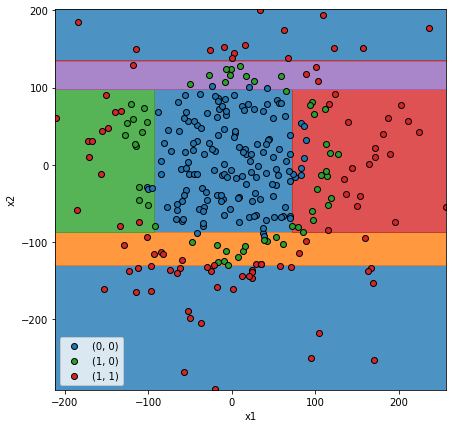

In [25]:
plot_tree_leafs_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names)

### 8 Leafs

In [26]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.015797170235556796, 5, 8)

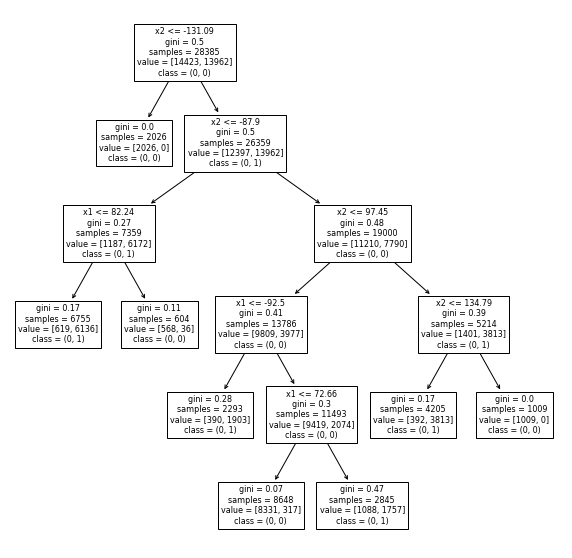

In [28]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(10, 10))

In [29]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. x1 <= 82.24140167236328 and -131.08855438232422 < x2 <= -87.90436935424805 => (0, 1) [619, 6136]
2. 97.4512710571289 < x2 <= 134.79154205322266 => (0, 1) [392, 3813]
3. x1 > 72.6623764038086 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [1088, 1757]
4. x1 <= -92.50411605834961 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [390, 1903]


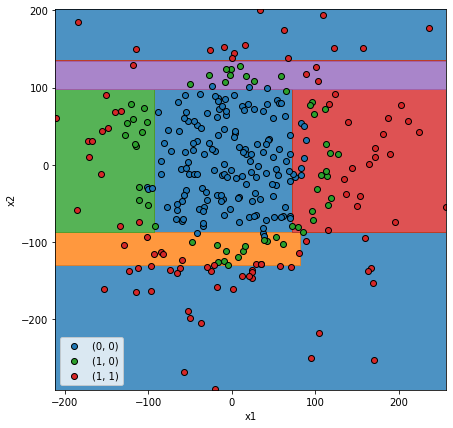

In [30]:
plot_tree_leafs_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names)

### 9 Leafs

In [31]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.014046559676262253, 5, 9)

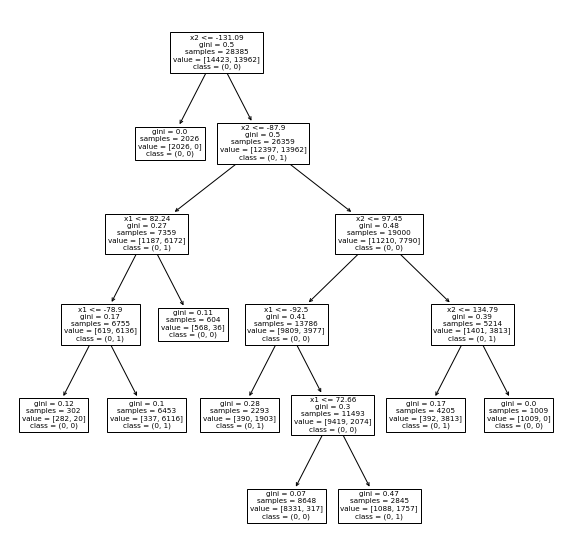

In [33]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(10, 10))

In [34]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -78.90192794799805 < x1 <= 82.24140167236328 and -131.08855438232422 < x2 <= -87.90436935424805 => (0, 1) [337, 6116]
2. 97.4512710571289 < x2 <= 134.79154205322266 => (0, 1) [392, 3813]
3. x1 > 72.6623764038086 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [1088, 1757]
4. x1 <= -92.50411605834961 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [390, 1903]


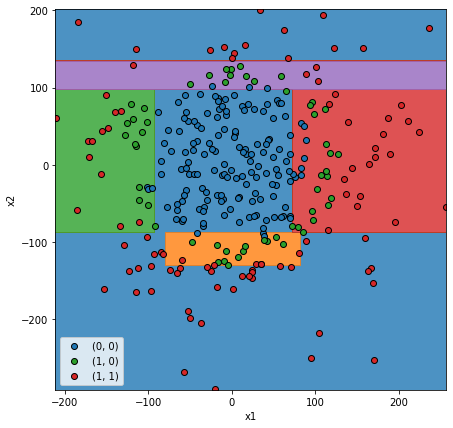

In [35]:
plot_tree_leafs_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names)

### 10 Leafs

In [36]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.011258845221568392, 5, 10)

In [39]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -78.90192794799805 < x1 <= 82.24140167236328 and -131.08855438232422 < x2 <= -87.90436935424805 => (0, 1) [337, 6116]
2. 97.4512710571289 < x2 <= 134.79154205322266 => (0, 1) [392, 3813]
3. x1 > 72.6623764038086 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [1088, 1757]
4. -142.04877471923828 < x1 <= -92.50411605834961 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [133, 1903]


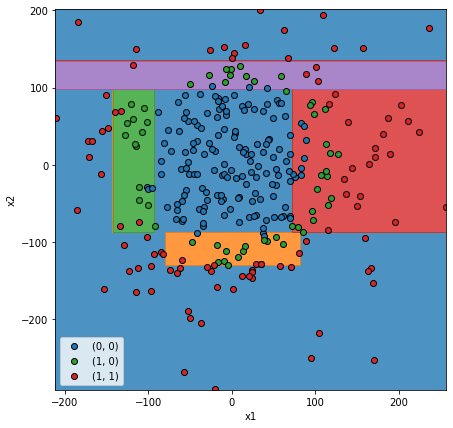

In [40]:
plot_tree_leafs_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names)

### 11 Leafs

In [41]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.008288018981693082, 6, 11)

In [43]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -78.90192794799805 < x1 <= 82.24140167236328 and -131.08855438232422 < x2 <= -87.90436935424805 => (0, 1) [337, 6116]
2. 97.4512710571289 < x2 <= 134.79154205322266 => (0, 1) [392, 3813]
3. 72.6623764038086 < x1 <= 131.27032470703125 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [721, 1756]
4. -142.04877471923828 < x1 <= -92.50411605834961 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [133, 1903]


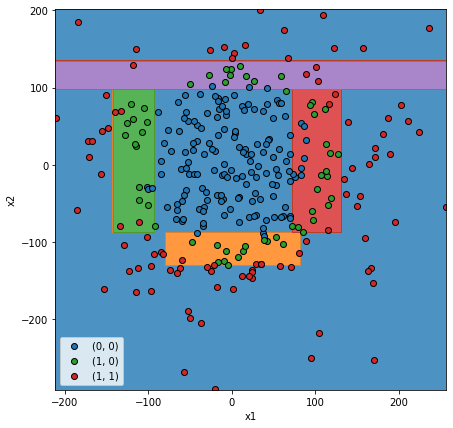

In [44]:
plot_tree_leafs_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names)

### 13 Leafs

In [45]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.004910902027399646, 8, 13)

In [47]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -78.90192794799805 < x1 <= 82.24140167236328 and -131.08855438232422 < x2 <= -87.90436935424805 => (0, 1) [337, 6116]
2. 97.4512710571289 < x2 <= 134.79154205322266 => (0, 1) [392, 3813]
3. -142.04877471923828 < x1 <= -92.50411605834961 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [133, 1903]
4. 96.62620162963867 < x1 <= 131.27032470703125 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [172, 1219]
5. 72.6623764038086 < x1 <= 96.62620162963867 and -87.90436935424805 < x2 <= -37.90612983703613 => (0, 1) [128, 513]


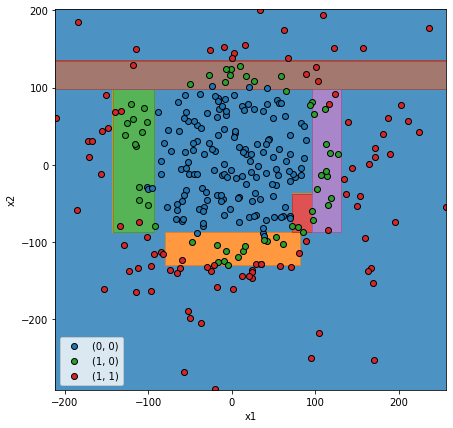

In [48]:
plot_tree_leafs_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names)

### 16 Leafs

In [49]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.004213471608819216, 8, 16)

In [51]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -78.90192794799805 < x1 <= 82.24140167236328 and -131.08855438232422 < x2 <= -87.90436935424805 => (0, 1) [337, 6116]
2. 97.4512710571289 < x2 <= 128.95016479492188 => (0, 1) [122, 3169]
3. -142.04877471923828 < x1 <= -92.50411605834961 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [133, 1903]
4. 96.62620162963867 < x1 <= 131.27032470703125 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [172, 1219]
5. -34.92379379272461 < x1 <= 47.73039436340332 and 128.95016479492188 < x2 <= 134.79154205322266 => (0, 1) [16, 629]
6. 72.6623764038086 < x1 <= 96.62620162963867 and -87.90436935424805 < x2 <= -37.90612983703613 => (0, 1) [128, 513]


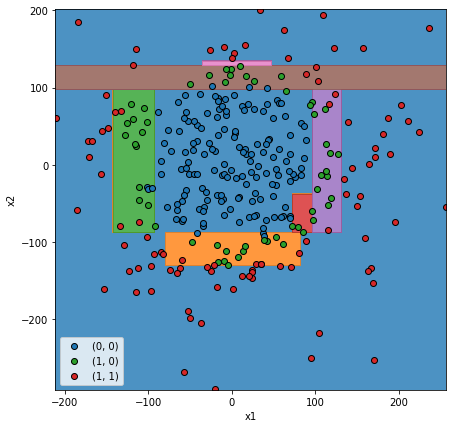

In [52]:
plot_tree_leafs_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names)

### 19 Leafs

In [53]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.0025067624553640464, 8, 19)

In [55]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -78.90192794799805 < x1 <= 82.24140167236328 and -131.08855438232422 < x2 <= -87.90436935424805 => (0, 1) [337, 6116]
2. 97.4512710571289 < x2 <= 128.95016479492188 => (0, 1) [122, 3169]
3. -142.04877471923828 < x1 <= -92.50411605834961 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [133, 1903]
4. 96.62620162963867 < x1 <= 131.27032470703125 and -87.90436935424805 < x2 <= 97.4512710571289 => (0, 1) [172, 1219]
5. -34.92379379272461 < x1 <= 47.73039436340332 and 128.95016479492188 < x2 <= 134.79154205322266 => (0, 1) [16, 629]
6. 72.6623764038086 < x1 <= 96.62620162963867 and -87.90436935424805 < x2 <= -37.90612983703613 => (0, 1) [128, 513]
7. 55.00529670715332 < x1 <= 72.6623764038086 and -87.90436935424805 < x2 <= -74.37813949584961 => (0, 1) [4, 104]
8. -92.50411605834961 < x1 <= -53.30276679992676 and -87.90436935424805 < x2 <= -74.37813949584961 => (0, 1) [3, 92]


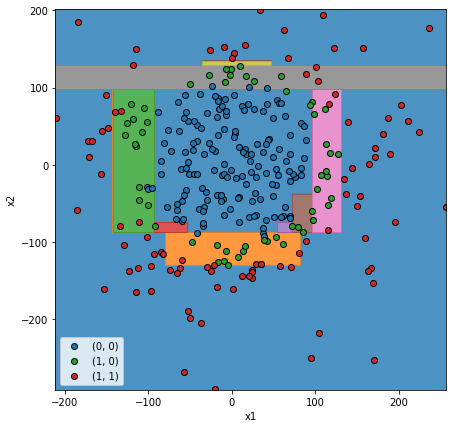

In [56]:
plot_tree_leafs_for_class(tree, tree.classes_, [tree.classes_[1]], X, mclass_diff, comparer.class_names, feature_names)

# Evaluation

In [57]:
with open('test.pickle', 'rb') as f:
    X_test, y_test = pickle.load(f)

In [58]:
explanations_per_class = {}
for class_name in comparer.class_names:
    with open(f'diro2c.{class_name}.pickle', 'rb') as f:
        explanations_per_class[class_name] = pickle.load(f)

In [67]:
metrics = eval_diro2c(explanations_per_class, X_test, y_test, comparer.class_names)
metrics

,Precision,Recall,F1 Score,Support,Label,Leafs,Alpha,Rules,Constraints
1,0.627593,0.977608,0.764440,4332.0,"(0, 0)",3.0,0.114107,1.0,2.0
1,0.717272,0.966297,0.823367,4332.0,"(0, 0)",4.0,0.051891,1.0,3.0
1,0.912957,0.956371,0.934160,4332.0,"(0, 0)",5.0,0.012029,1.0,4.0
1,0.912957,0.956371,0.934160,4332.0,"(0, 0)",6.0,0.009573,2.0,8.0
1,0.943784,0.953370,0.948553,4332.0,"(0, 0)",8.0,0.005482,2.0,8.0
...,...,...,...,...,...,...,...,...,...
1,0.984022,0.992561,0.988273,4033.0,"(1, 1)",153.0,0.000025,86.0,327.0
1,0.984256,0.992065,0.988145,4033.0,"(1, 1)",157.0,0.000024,88.0,335.0
1,0.984260,0.992313,0.988270,4033.0,"(1, 1)",159.0,0.000014,89.0,339.0
1,0.984256,0.992065,0.988145,4033.0,"(1, 1)",163.0,0.000014,92.0,347.0


In [68]:
grouped_metrics, constraints = group_metrics(metrics, by='Alpha')

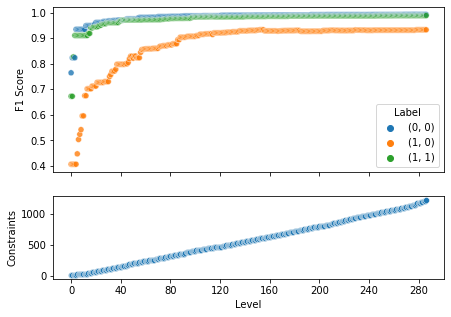

In [69]:
fig, axs = plt.subplots(nrows=2, figsize=(7, 5), sharex='all', gridspec_kw={'height_ratios': [2,1]})
sns.scatterplot(data=grouped_metrics, x='Level', y='F1 Score', hue='Label', alpha=0.8, ax=axs[0])
sns.scatterplot(data=constraints, ax=axs[1])
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig('gaussian-diro2c-fidelity.pdf')

In [70]:
grouped_metrics

Label  Precision    Recall  F1 Score  Support  Leafs     Alpha  \
Level                                                                      
0     0  (0, 0)   0.627593  0.977608  0.764440   4332.0    3.0  0.114107   
      1  (1, 0)   0.295448  0.655046  0.407224   1635.0    5.0  0.050902   
      2  (1, 1)   0.873960  0.546739  0.672666   4033.0    3.0  0.083202   
1     0  (0, 0)   0.717272  0.966297  0.823367   4332.0    4.0  0.051891   
      1  (1, 0)   0.295448  0.655046  0.407224   1635.0    5.0  0.050902   
...         ...        ...       ...       ...      ...    ...       ...   
285   1  (1, 0)   0.897117  0.970642  0.932432   1635.0  257.0  0.000000   
      2  (1, 1)   0.984256  0.992065  0.988145   4033.0  163.0  0.000014   
286   0  (0, 0)   0.992377  0.991690  0.992033   4332.0  191.0  0.000000   
      1  (1, 0)   0.897117  0.970642  0.932432   1635.0  257.0  0.000000   
      2  (1, 1)   0.984256  0.992065  0.988145   4033.0  167.0  0.000000   

         Rules  Constraints  
Level                        
0     0    1.0          2.0  
      1    3.0          6.0  
      2    2.0          2.0  
1     0    1.0          3.0  
      1    3.0          6.0  
...        ...          ...  
285   1  129.0        514.0  
      2   92.0        347.0  
286   0   87.0        348.0  
      1  129.0        514.0  
      2   95.0        359.0  

[861 rows x 9 columns]

In [71]:
constraints

Level
0        10.0
1        11.0
2        14.0
3        17.0
4        18.0
        ...  
282    1185.0
283    1189.0
284    1201.0
285    1209.0
286    1221.0
Name: Constraints, Length: 287, dtype: float64